In [1]:
import dask
import dask.array as da
import numpy as np

from dask.distributed import Client

client = Client()

In [2]:
beta = np.random.random(100)

In [3]:
X = da.random.normal(0, 1, size=(1000000, 100), chunks=(100000, 100))
y = X.dot(beta) + da.random.normal(0, 1, size=1000000, chunks=(100000,))

In [4]:
X, y = dask.persist(X, y)
client.rebalance([X, y])

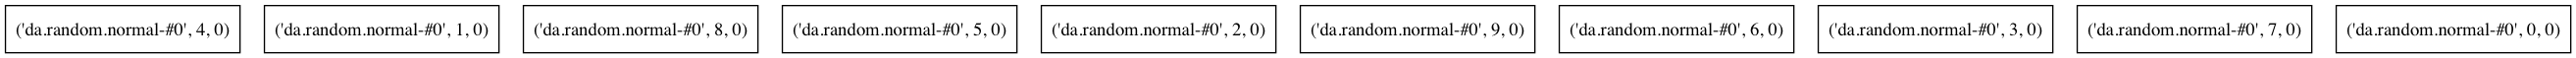

In [5]:

beta_star = da.linalg.solve(X.T.dot(X), X.T.dot(y))
abs(beta_star.compute() - beta).max()


0.0033037574401303393

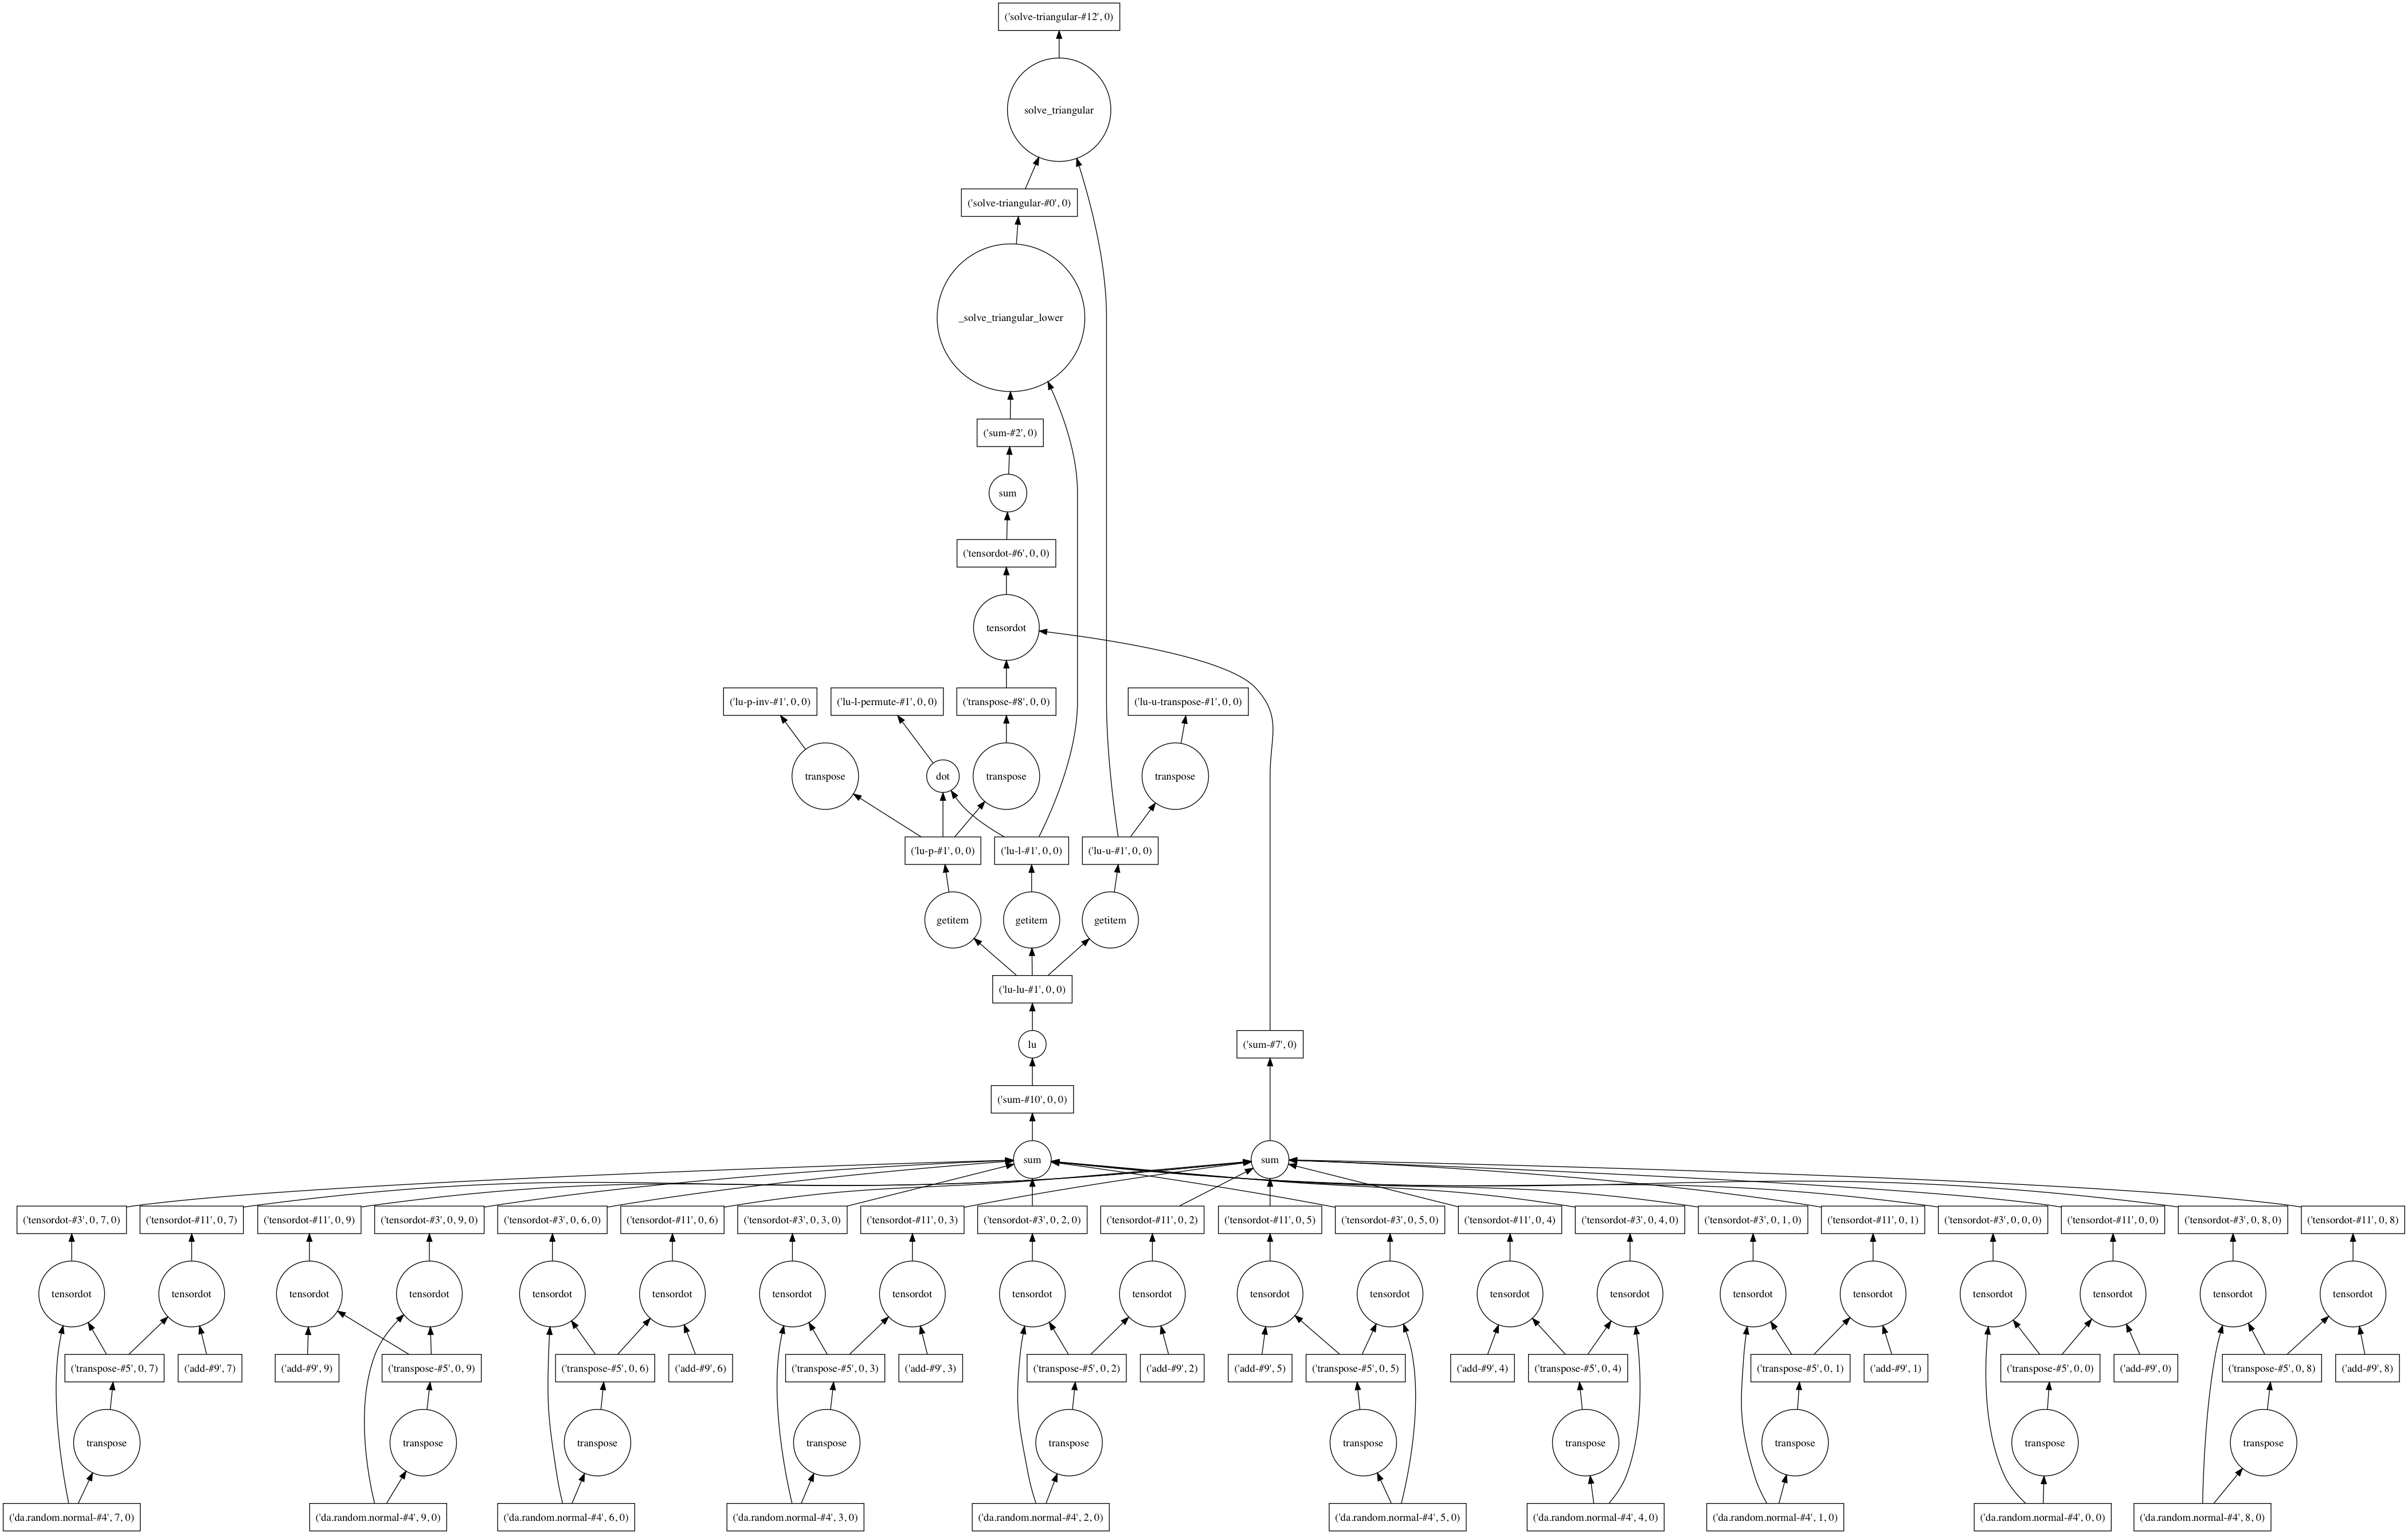

In [11]:
beta_star.visualize()

In [6]:
_, s, _ = np.linalg.svd(2*X.T.dot(X))
step_size = 1 /(s) - 1e-8

In [17]:
max_steps = 100
tolerance = 1e-8
beta_hat = np.zeros(100)
for k in range(max_steps):
    XBeta = X.dot(beta_hat)
    func = ((y - XBeta)**2).sum()
    gradient = 2 * X.T.dot(XBeta - y)
    
    
    obeta = beta_hat
    beta_hat = beta_hat - step_size * gradient
    new_func = ((y - X.dot(beta_hat))**2).sum()
    beta_hat, func, new_func = dask.compute(beta_hat, func, new_func)

    
    change = np.absolute(beta_hat - obeta).max()
    
    
    if change < tolerance:
        break
        
        


In [18]:
abs(beta_hat - beta).max()

0.0033037574812759263